In [1]:
!ls

'Calculate metrics.ipynb'	   queries_res_no_headers.csv
'Calculate predictions.ipynb'	   queries_res_no_headers_marked.csv
'Check NER correspondence.ipynb'   queries_res_with_names.csv
 no_headers_stat.csv		   Querries.csv
 queries_res2.csv		   Querries.v2.csv
 queries_res2_marked.csv	   with_headers_stat2.csv
 queries_res.csv		   with_headers_stat.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('with_headers_stat2.csv', index_col='Unnamed: 0')
df.head()

Query  top1_dist  \
0             British rock   0.283977   
1         Riemann integral   0.016512   
2                 Integral   0.015928   
3    Differentiation rules   0.015038   
4  Continuous bag of words   0.334625   

                                           top1  top1_rel  top2_dist  \
0  https://en.wikipedia.org/wiki?curid=30637650         1   0.299541   
1     https://en.wikipedia.org/wiki?curid=26390         2   0.087361   
2     https://en.wikipedia.org/wiki?curid=15532         2   0.015928   
3  https://en.wikipedia.org/wiki?curid=10308785         2   0.136908   
4  https://en.wikipedia.org/wiki?curid=21784490         0   0.365514   

                                           top2  top2_rel  top3_dist  \
0    https://en.wikipedia.org/wiki?curid=425492         0   0.304202   
1  https://en.wikipedia.org/wiki?curid=12314844         1   0.114044   
2   https://en.wikipedia.org/wiki?curid=1529187         2   0.090665   
3     https://en.wikipedia.org/wiki?curid=61335         2   0.146164   
4  https://en.wikipedia.org/wiki?curid=11633687         0   0.376075   

                                           top3  top3_rel  top4_dist  \
0  https://en.wikipedia.org/wiki?curid=29406798         0   0.306770   
1    https://en.wikipedia.org/wiki?curid=176478         1   0.116290   
2  https://en.wikipedia.org/wiki?curid=61253455         1   0.103952   
3  https://en.wikipedia.org/wiki?curid=13479905         1   0.150099   
4   https://en.wikipedia.org/wiki?curid=4013888         0   0.398350   

                                           top4  top4_rel  top5_dist  \
0   https://en.wikipedia.org/wiki?curid=2414799         1   0.310063   
1  https://en.wikipedia.org/wiki?curid=19344125         1   0.128624   
2   https://en.wikipedia.org/wiki?curid=9478630         1   0.113608   
3  https://en.wikipedia.org/wiki?curid=10265555         1   0.199049   
4     https://en.wikipedia.org/wiki?curid=88699         0   0.405603   

                                           top5  top5_rel      ndcg    pfound  
0  https://en.wikipedia.org/wiki?curid=29421430         0  0.161743  0.228301  
1    https://en.wikipedia.org/wiki?curid=567743         2  0.646910  0.648643  
2  https://en.wikipedia.org/wiki?curid=19801510         2  0.789568  0.725513  
3  https://en.wikipedia.org/wiki?curid=13478284         1  0.702098  0.691569  
4   https://en.wikipedia.org/wiki?curid=6472479         0  0.000000  0.000000

In [4]:
from nerd import ner
l = [ner.name(i,language='xx_ent_wiki_sm') for i in df.Query]
counts = [len(i) for i in l]
print(counts)
print(sum(counts))
print(sum(counts)/len(df))
print(l)

[1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
63
0.65625
[(British,), (Riemann,), (), (), (), (Transformers Neural Net,), (), (), (Online office,), (North Alaska,), (British television series,), (), (Brain,), (), (British,), (BLAS,), (Music Library,), (Web Chat,), (), (), (SLI Nvidia,), (Attention Neural Nets,), (Statistical Machine Transaltion,), (Prisoner's Dilemma,), (), (Javascript language,), (Bethesda Softworks,), (Half Life,), (Moscow,), (Pushkin,), (Filter Design,), (Reinforcement Learning,), (Autoencoders,), (Russia,), (Netflix series,), (), (), (), (), (), (Tasty,), (Rick Astley Hits,), (Blood Types,), (Superposition Principle,), (Albino,), (), (Motion Control,), (Virtual Reality,), (), (Russian,), (Japanese,), (AA Batteries,), (), (Meth

In [5]:
df['NER_count'] = counts
df['NER'] = l
df.head()

Query  top1_dist  \
0             British rock   0.283977   
1         Riemann integral   0.016512   
2                 Integral   0.015928   
3    Differentiation rules   0.015038   
4  Continuous bag of words   0.334625   

                                           top1  top1_rel  top2_dist  \
0  https://en.wikipedia.org/wiki?curid=30637650         1   0.299541   
1     https://en.wikipedia.org/wiki?curid=26390         2   0.087361   
2     https://en.wikipedia.org/wiki?curid=15532         2   0.015928   
3  https://en.wikipedia.org/wiki?curid=10308785         2   0.136908   
4  https://en.wikipedia.org/wiki?curid=21784490         0   0.365514   

                                           top2  top2_rel  top3_dist  \
0    https://en.wikipedia.org/wiki?curid=425492         0   0.304202   
1  https://en.wikipedia.org/wiki?curid=12314844         1   0.114044   
2   https://en.wikipedia.org/wiki?curid=1529187         2   0.090665   
3     https://en.wikipedia.org/wiki?curid=61335         2   0.146164   
4  https://en.wikipedia.org/wiki?curid=11633687         0   0.376075   

                                           top3  top3_rel  top4_dist  \
0  https://en.wikipedia.org/wiki?curid=29406798         0   0.306770   
1    https://en.wikipedia.org/wiki?curid=176478         1   0.116290   
2  https://en.wikipedia.org/wiki?curid=61253455         1   0.103952   
3  https://en.wikipedia.org/wiki?curid=13479905         1   0.150099   
4   https://en.wikipedia.org/wiki?curid=4013888         0   0.398350   

                                           top4  top4_rel  top5_dist  \
0   https://en.wikipedia.org/wiki?curid=2414799         1   0.310063   
1  https://en.wikipedia.org/wiki?curid=19344125         1   0.128624   
2   https://en.wikipedia.org/wiki?curid=9478630         1   0.113608   
3  https://en.wikipedia.org/wiki?curid=10265555         1   0.199049   
4     https://en.wikipedia.org/wiki?curid=88699         0   0.405603   

                                           top5  top5_rel      ndcg    pfound  \
0  https://en.wikipedia.org/wiki?curid=29421430         0  0.161743  0.228301   
1    https://en.wikipedia.org/wiki?curid=567743         2  0.646910  0.648643   
2  https://en.wikipedia.org/wiki?curid=19801510         2  0.789568  0.725513   
3  https://en.wikipedia.org/wiki?curid=13478284         1  0.702098  0.691569   
4   https://en.wikipedia.org/wiki?curid=6472479         0  0.000000  0.000000   

   NER_count           NER  
0          1  ((British),)  
1          1  ((Riemann),)  
2          0            ()  
3          0            ()  
4          0            ()

In [7]:
df.to_csv('with_headers_stat_ner.csv')

In [36]:
df.ndcg.describe()

count    96.000000
mean      0.351122
std       0.278909
min       0.000000
25%       0.071329
50%       0.339160
75%       0.559440
max       1.000000
Name: ndcg, dtype: float64

In [37]:
df.pfound.describe()

count    96.000000
mean      0.381450
std       0.258963
min       0.000000
25%       0.127500
50%       0.400000
75%       0.601417
max       0.788161
Name: pfound, dtype: float64

In [39]:
df.NER_count.describe()

count    96.000000
mean      0.656250
std       0.499012
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: NER_count, dtype: float64

In [51]:
corr_df = df[['ndcg','pfound','NER_count']]

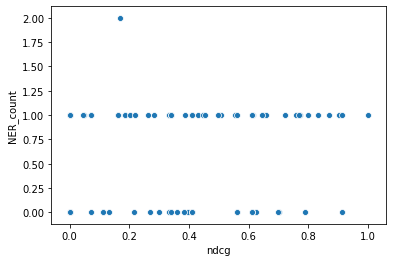

In [73]:
sns.scatterplot(df.ndcg, df.NER_count)

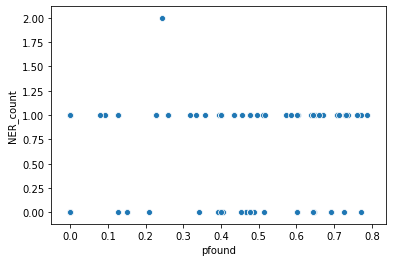

In [74]:
sns.scatterplot(df.pfound, df.NER_count)

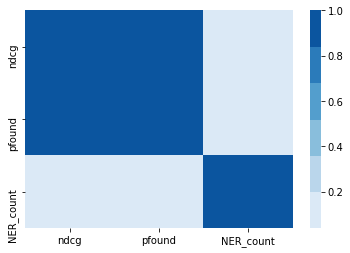

In [58]:
sns.heatmap(corr_df.corr('pearson'), cmap=sns.color_palette("Blues"))

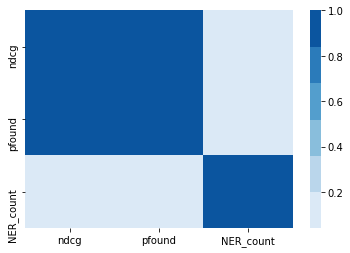

In [59]:
sns.heatmap(corr_df.corr('spearman'), cmap=sns.color_palette("Blues"))

In [71]:
print(corr_df.corr('pearson').NER_count)
print(corr_df.corr('spearman').NER_count)

ndcg         0.057150
pfound       0.039956
NER_count    1.000000
Name: NER_count, dtype: float64
ndcg         0.057782
pfound       0.041511
NER_count    1.000000
Name: NER_count, dtype: float64


$H_0$: NER_count and dcg are correlated

$H_1$:NER_count and pfound are correlated